# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

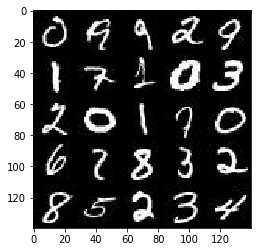

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

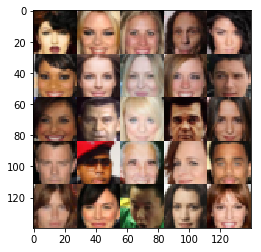

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    lr = tf.placeholder(tf.float32,name='lr')

    return real_inputs, z_inputs, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)
    
    saver = tf.train.Saver()
    
    steps = 0
    total_steps = epoch_count * batch_size
    losses = []
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    # show samples
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


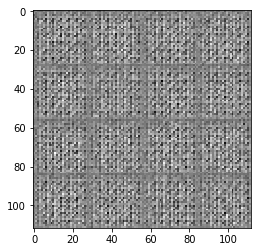

Epoch 1/2... Discriminator Loss: 5.6276... Generator Loss: 0.0092
Epoch 1/2... Discriminator Loss: 0.6542... Generator Loss: 4.0849
Epoch 1/2... Discriminator Loss: 1.6107... Generator Loss: 0.7680
Epoch 1/2... Discriminator Loss: 1.5132... Generator Loss: 0.6234
Epoch 1/2... Discriminator Loss: 2.4074... Generator Loss: 0.1988
Epoch 1/2... Discriminator Loss: 1.9279... Generator Loss: 1.8872
Epoch 1/2... Discriminator Loss: 1.5260... Generator Loss: 1.6995
Epoch 1/2... Discriminator Loss: 1.7654... Generator Loss: 0.3605
Epoch 1/2... Discriminator Loss: 1.7531... Generator Loss: 0.3495
Epoch 1/2... Discriminator Loss: 1.5805... Generator Loss: 0.4326


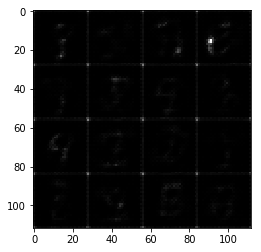

Epoch 1/2... Discriminator Loss: 1.5156... Generator Loss: 1.7822
Epoch 1/2... Discriminator Loss: 1.7756... Generator Loss: 0.3261
Epoch 1/2... Discriminator Loss: 1.1771... Generator Loss: 1.1782
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 0.6180
Epoch 1/2... Discriminator Loss: 1.2654... Generator Loss: 0.6872
Epoch 1/2... Discriminator Loss: 1.4685... Generator Loss: 0.4870
Epoch 1/2... Discriminator Loss: 1.4234... Generator Loss: 0.5632
Epoch 1/2... Discriminator Loss: 1.1319... Generator Loss: 0.7747
Epoch 1/2... Discriminator Loss: 0.9901... Generator Loss: 1.2018
Epoch 1/2... Discriminator Loss: 0.9736... Generator Loss: 1.3328


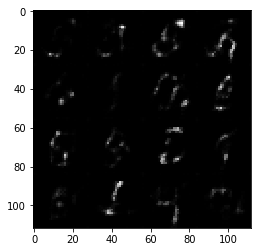

Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 1.7091
Epoch 1/2... Discriminator Loss: 1.0569... Generator Loss: 0.9004
Epoch 1/2... Discriminator Loss: 1.0389... Generator Loss: 1.0169
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 1.6941
Epoch 1/2... Discriminator Loss: 1.3450... Generator Loss: 0.5705
Epoch 1/2... Discriminator Loss: 1.1124... Generator Loss: 1.7511
Epoch 1/2... Discriminator Loss: 0.9221... Generator Loss: 1.3597
Epoch 1/2... Discriminator Loss: 1.8194... Generator Loss: 0.4068
Epoch 1/2... Discriminator Loss: 1.2300... Generator Loss: 0.9313
Epoch 1/2... Discriminator Loss: 1.3356... Generator Loss: 0.6245


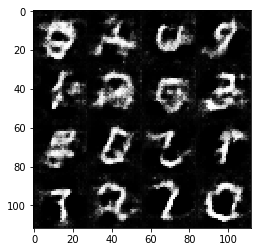

Epoch 1/2... Discriminator Loss: 1.3980... Generator Loss: 1.8357
Epoch 1/2... Discriminator Loss: 1.4148... Generator Loss: 0.5148
Epoch 1/2... Discriminator Loss: 1.4876... Generator Loss: 0.4771
Epoch 1/2... Discriminator Loss: 1.3896... Generator Loss: 0.5425
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 0.5848
Epoch 1/2... Discriminator Loss: 1.3125... Generator Loss: 0.6521
Epoch 1/2... Discriminator Loss: 1.2103... Generator Loss: 1.0057
Epoch 1/2... Discriminator Loss: 1.2206... Generator Loss: 1.5939
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.7622
Epoch 1/2... Discriminator Loss: 1.2580... Generator Loss: 1.7067


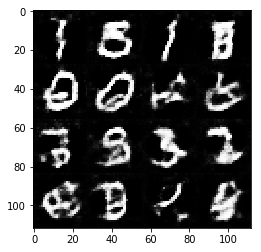

Epoch 1/2... Discriminator Loss: 1.1832... Generator Loss: 1.7458
Epoch 1/2... Discriminator Loss: 1.2165... Generator Loss: 0.7154
Epoch 1/2... Discriminator Loss: 1.3837... Generator Loss: 2.2127
Epoch 1/2... Discriminator Loss: 1.0342... Generator Loss: 0.9796
Epoch 1/2... Discriminator Loss: 1.2023... Generator Loss: 1.1149
Epoch 1/2... Discriminator Loss: 1.2761... Generator Loss: 1.1749
Epoch 1/2... Discriminator Loss: 1.0465... Generator Loss: 1.2747
Epoch 1/2... Discriminator Loss: 1.2093... Generator Loss: 1.4224
Epoch 1/2... Discriminator Loss: 1.1030... Generator Loss: 0.8281
Epoch 1/2... Discriminator Loss: 1.2310... Generator Loss: 0.7557


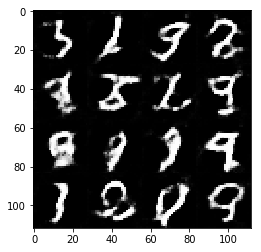

Epoch 1/2... Discriminator Loss: 1.0973... Generator Loss: 0.8162
Epoch 1/2... Discriminator Loss: 1.0393... Generator Loss: 1.3667
Epoch 1/2... Discriminator Loss: 1.2050... Generator Loss: 0.8434
Epoch 1/2... Discriminator Loss: 1.0602... Generator Loss: 1.3901
Epoch 1/2... Discriminator Loss: 1.3044... Generator Loss: 1.7176
Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 1.6943
Epoch 1/2... Discriminator Loss: 1.5295... Generator Loss: 2.1925
Epoch 1/2... Discriminator Loss: 1.2945... Generator Loss: 0.5914
Epoch 1/2... Discriminator Loss: 1.6726... Generator Loss: 0.3732
Epoch 1/2... Discriminator Loss: 1.1181... Generator Loss: 0.9073


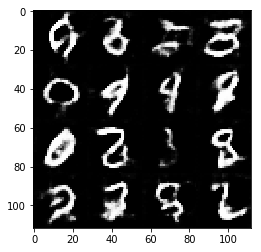

Epoch 1/2... Discriminator Loss: 1.1589... Generator Loss: 0.9846
Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 0.5730
Epoch 1/2... Discriminator Loss: 1.0873... Generator Loss: 1.4835
Epoch 1/2... Discriminator Loss: 1.2649... Generator Loss: 2.0230
Epoch 1/2... Discriminator Loss: 1.1600... Generator Loss: 0.8240
Epoch 1/2... Discriminator Loss: 0.9343... Generator Loss: 1.1766
Epoch 1/2... Discriminator Loss: 1.0081... Generator Loss: 1.3318
Epoch 1/2... Discriminator Loss: 1.2240... Generator Loss: 0.6690
Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 0.8282
Epoch 1/2... Discriminator Loss: 1.3300... Generator Loss: 0.5743


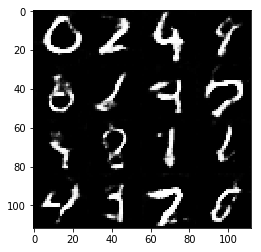

Epoch 1/2... Discriminator Loss: 1.1673... Generator Loss: 1.5528
Epoch 1/2... Discriminator Loss: 0.9950... Generator Loss: 1.3359
Epoch 1/2... Discriminator Loss: 0.9954... Generator Loss: 1.2318
Epoch 1/2... Discriminator Loss: 1.1792... Generator Loss: 1.2622
Epoch 1/2... Discriminator Loss: 0.9706... Generator Loss: 1.2995
Epoch 1/2... Discriminator Loss: 1.1090... Generator Loss: 0.8752
Epoch 1/2... Discriminator Loss: 1.5610... Generator Loss: 2.8836
Epoch 1/2... Discriminator Loss: 1.0801... Generator Loss: 1.0504
Epoch 1/2... Discriminator Loss: 1.0652... Generator Loss: 0.9104
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 1.4099


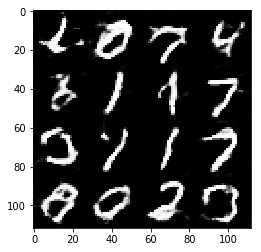

Epoch 1/2... Discriminator Loss: 1.1155... Generator Loss: 0.8111
Epoch 1/2... Discriminator Loss: 1.2115... Generator Loss: 2.3445
Epoch 1/2... Discriminator Loss: 0.8547... Generator Loss: 1.3697
Epoch 1/2... Discriminator Loss: 1.3149... Generator Loss: 0.5810
Epoch 1/2... Discriminator Loss: 1.1560... Generator Loss: 0.7096
Epoch 1/2... Discriminator Loss: 1.8118... Generator Loss: 0.5369
Epoch 1/2... Discriminator Loss: 1.1427... Generator Loss: 1.4639
Epoch 1/2... Discriminator Loss: 0.9789... Generator Loss: 1.4122
Epoch 1/2... Discriminator Loss: 1.0063... Generator Loss: 1.1757
Epoch 1/2... Discriminator Loss: 1.0808... Generator Loss: 1.5832


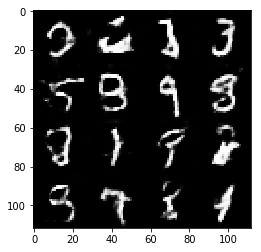

Epoch 1/2... Discriminator Loss: 1.4510... Generator Loss: 0.4588
Epoch 1/2... Discriminator Loss: 0.9667... Generator Loss: 1.2765
Epoch 1/2... Discriminator Loss: 1.2486... Generator Loss: 2.0173
Epoch 2/2... Discriminator Loss: 0.9588... Generator Loss: 1.4513
Epoch 2/2... Discriminator Loss: 1.1079... Generator Loss: 0.9272
Epoch 2/2... Discriminator Loss: 1.7579... Generator Loss: 0.3537
Epoch 2/2... Discriminator Loss: 1.4792... Generator Loss: 0.4997
Epoch 2/2... Discriminator Loss: 1.0108... Generator Loss: 1.0852
Epoch 2/2... Discriminator Loss: 1.3127... Generator Loss: 0.5722
Epoch 2/2... Discriminator Loss: 1.2640... Generator Loss: 0.5714


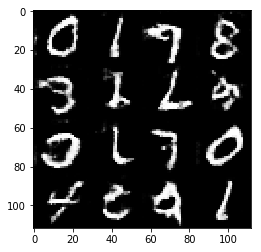

Epoch 2/2... Discriminator Loss: 1.0205... Generator Loss: 0.8691
Epoch 2/2... Discriminator Loss: 1.1027... Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 1.1184... Generator Loss: 0.8448
Epoch 2/2... Discriminator Loss: 0.8946... Generator Loss: 1.7152
Epoch 2/2... Discriminator Loss: 0.9483... Generator Loss: 1.1949
Epoch 2/2... Discriminator Loss: 1.6531... Generator Loss: 0.4051
Epoch 2/2... Discriminator Loss: 1.0281... Generator Loss: 0.8680
Epoch 2/2... Discriminator Loss: 1.1232... Generator Loss: 0.7544
Epoch 2/2... Discriminator Loss: 0.9106... Generator Loss: 1.0860
Epoch 2/2... Discriminator Loss: 1.1296... Generator Loss: 0.7233


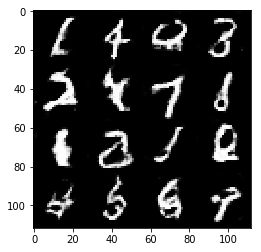

Epoch 2/2... Discriminator Loss: 1.1526... Generator Loss: 0.9718
Epoch 2/2... Discriminator Loss: 1.2436... Generator Loss: 1.5441
Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 0.6209
Epoch 2/2... Discriminator Loss: 1.0451... Generator Loss: 1.2680
Epoch 2/2... Discriminator Loss: 1.0798... Generator Loss: 0.8271
Epoch 2/2... Discriminator Loss: 1.1150... Generator Loss: 0.7837
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 1.3481
Epoch 2/2... Discriminator Loss: 1.2119... Generator Loss: 0.6755
Epoch 2/2... Discriminator Loss: 1.0724... Generator Loss: 1.0897
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 1.0390


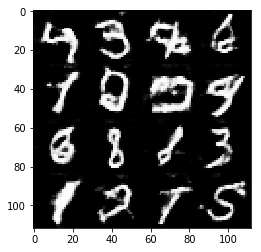

Epoch 2/2... Discriminator Loss: 1.3584... Generator Loss: 0.5520
Epoch 2/2... Discriminator Loss: 1.2920... Generator Loss: 0.6416
Epoch 2/2... Discriminator Loss: 1.0927... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 1.0899... Generator Loss: 0.7821
Epoch 2/2... Discriminator Loss: 1.1294... Generator Loss: 0.8115
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 1.2433
Epoch 2/2... Discriminator Loss: 0.9881... Generator Loss: 1.6776
Epoch 2/2... Discriminator Loss: 0.9072... Generator Loss: 1.1611
Epoch 2/2... Discriminator Loss: 1.1309... Generator Loss: 0.7158
Epoch 2/2... Discriminator Loss: 1.0065... Generator Loss: 1.4791


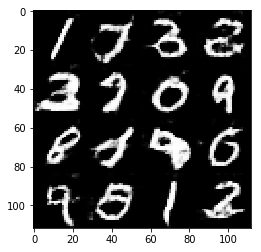

Epoch 2/2... Discriminator Loss: 1.1645... Generator Loss: 1.7886
Epoch 2/2... Discriminator Loss: 1.2066... Generator Loss: 2.0736
Epoch 2/2... Discriminator Loss: 1.0441... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 0.7033
Epoch 2/2... Discriminator Loss: 1.0565... Generator Loss: 0.9267
Epoch 2/2... Discriminator Loss: 1.1183... Generator Loss: 0.7693
Epoch 2/2... Discriminator Loss: 0.9754... Generator Loss: 1.3634
Epoch 2/2... Discriminator Loss: 0.8608... Generator Loss: 1.3061
Epoch 2/2... Discriminator Loss: 1.0556... Generator Loss: 1.0430
Epoch 2/2... Discriminator Loss: 0.9809... Generator Loss: 1.2004


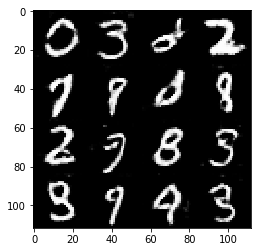

Epoch 2/2... Discriminator Loss: 0.9921... Generator Loss: 0.9111
Epoch 2/2... Discriminator Loss: 1.0137... Generator Loss: 2.1210
Epoch 2/2... Discriminator Loss: 1.5313... Generator Loss: 0.4546
Epoch 2/2... Discriminator Loss: 1.2838... Generator Loss: 0.6622
Epoch 2/2... Discriminator Loss: 1.0837... Generator Loss: 0.8916
Epoch 2/2... Discriminator Loss: 0.9136... Generator Loss: 1.4896
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 1.5844
Epoch 2/2... Discriminator Loss: 0.9153... Generator Loss: 1.1077
Epoch 2/2... Discriminator Loss: 0.9457... Generator Loss: 1.2933
Epoch 2/2... Discriminator Loss: 1.0000... Generator Loss: 1.2161


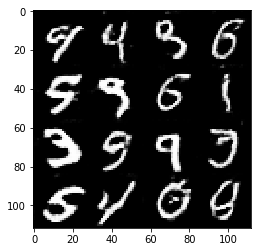

Epoch 2/2... Discriminator Loss: 1.2009... Generator Loss: 0.7478
Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 0.5994
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 1.3119
Epoch 2/2... Discriminator Loss: 0.9621... Generator Loss: 0.8918
Epoch 2/2... Discriminator Loss: 1.0335... Generator Loss: 0.8654
Epoch 2/2... Discriminator Loss: 1.7740... Generator Loss: 0.4262
Epoch 2/2... Discriminator Loss: 0.8581... Generator Loss: 1.1892
Epoch 2/2... Discriminator Loss: 1.4609... Generator Loss: 0.4991
Epoch 2/2... Discriminator Loss: 0.9158... Generator Loss: 1.4420
Epoch 2/2... Discriminator Loss: 1.0902... Generator Loss: 0.8190


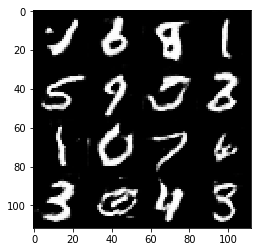

Epoch 2/2... Discriminator Loss: 1.2404... Generator Loss: 0.6607
Epoch 2/2... Discriminator Loss: 1.6326... Generator Loss: 2.7027
Epoch 2/2... Discriminator Loss: 1.0162... Generator Loss: 1.2683
Epoch 2/2... Discriminator Loss: 1.0190... Generator Loss: 2.3742
Epoch 2/2... Discriminator Loss: 1.2752... Generator Loss: 0.6175
Epoch 2/2... Discriminator Loss: 0.9866... Generator Loss: 1.7759
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 1.1381
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 1.9145
Epoch 2/2... Discriminator Loss: 0.7718... Generator Loss: 1.5585
Epoch 2/2... Discriminator Loss: 1.2917... Generator Loss: 0.9336


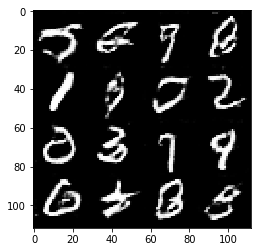

Epoch 2/2... Discriminator Loss: 1.0343... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 1.0148... Generator Loss: 1.3199
Epoch 2/2... Discriminator Loss: 1.4623... Generator Loss: 0.5862
Epoch 2/2... Discriminator Loss: 1.2272... Generator Loss: 2.3496
Epoch 2/2... Discriminator Loss: 0.9816... Generator Loss: 0.9121
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 1.2259
Epoch 2/2... Discriminator Loss: 0.8082... Generator Loss: 1.5489
Epoch 2/2... Discriminator Loss: 1.2475... Generator Loss: 0.7404
Epoch 2/2... Discriminator Loss: 1.2746... Generator Loss: 0.6523
Epoch 2/2... Discriminator Loss: 1.0545... Generator Loss: 0.8597


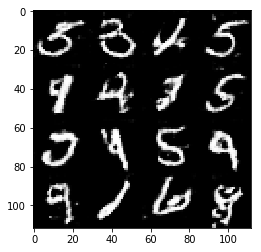

Epoch 2/2... Discriminator Loss: 1.1487... Generator Loss: 0.7211
Epoch 2/2... Discriminator Loss: 1.0546... Generator Loss: 0.8609
Epoch 2/2... Discriminator Loss: 0.8478... Generator Loss: 1.1845
Epoch 2/2... Discriminator Loss: 1.0813... Generator Loss: 1.9591
Epoch 2/2... Discriminator Loss: 1.0624... Generator Loss: 0.8970
Epoch 2/2... Discriminator Loss: 0.9784... Generator Loss: 0.9467
Epoch 2/2... Discriminator Loss: 1.2038... Generator Loss: 0.8203


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


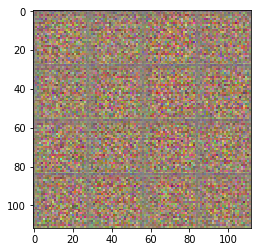

Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 1.3652
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 1.2744
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 3.5151
Epoch 1/1... Discriminator Loss: 0.7651... Generator Loss: 1.4436
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.0472... Generator Loss: 3.1754
Epoch 1/1... Discriminator Loss: 0.8327... Generator Loss: 1.3335
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.0564
Epoch 1/1... Discriminator Loss: 0.5699... Generator Loss: 2.3018


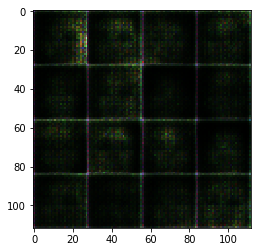

Epoch 1/1... Discriminator Loss: 1.1719... Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 2.4769... Generator Loss: 0.1702
Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 1.2906
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 1.0036... Generator Loss: 1.7671
Epoch 1/1... Discriminator Loss: 1.4648... Generator Loss: 0.5246
Epoch 1/1... Discriminator Loss: 1.5085... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 1.2246... Generator Loss: 3.6019
Epoch 1/1... Discriminator Loss: 1.3156... Generator Loss: 0.5985


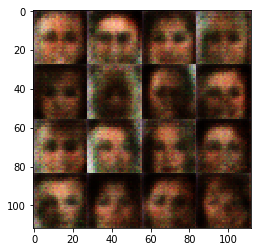

Epoch 1/1... Discriminator Loss: 2.2499... Generator Loss: 0.2283
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 1.8871
Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.5302... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 1.2799
Epoch 1/1... Discriminator Loss: 0.9969... Generator Loss: 0.8805
Epoch 1/1... Discriminator Loss: 0.9431... Generator Loss: 1.1137
Epoch 1/1... Discriminator Loss: 0.7066... Generator Loss: 1.4621
Epoch 1/1... Discriminator Loss: 0.6575... Generator Loss: 3.1869
Epoch 1/1... Discriminator Loss: 1.4840... Generator Loss: 0.4646


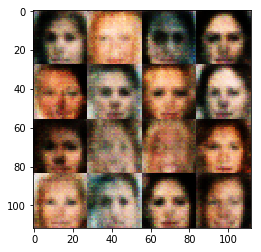

Epoch 1/1... Discriminator Loss: 0.6089... Generator Loss: 2.0832
Epoch 1/1... Discriminator Loss: 1.6064... Generator Loss: 0.4490
Epoch 1/1... Discriminator Loss: 0.9254... Generator Loss: 0.9858
Epoch 1/1... Discriminator Loss: 1.6338... Generator Loss: 0.3832
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 0.7900
Epoch 1/1... Discriminator Loss: 0.5892... Generator Loss: 1.9753
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 0.9115... Generator Loss: 2.8048
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 1.5832
Epoch 1/1... Discriminator Loss: 0.5548... Generator Loss: 4.2340


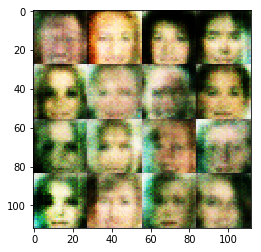

Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 4.0572
Epoch 1/1... Discriminator Loss: 3.2585... Generator Loss: 0.0762
Epoch 1/1... Discriminator Loss: 0.8194... Generator Loss: 1.1592
Epoch 1/1... Discriminator Loss: 1.8711... Generator Loss: 0.2977
Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 2.2117
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.0341
Epoch 1/1... Discriminator Loss: 1.0702... Generator Loss: 6.3548
Epoch 1/1... Discriminator Loss: 0.6154... Generator Loss: 3.4897
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 5.1268
Epoch 1/1... Discriminator Loss: 0.4230... Generator Loss: 3.4285


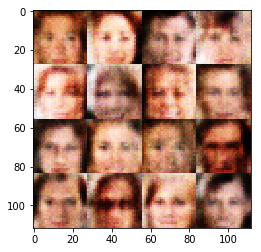

Epoch 1/1... Discriminator Loss: 0.4783... Generator Loss: 4.2477
Epoch 1/1... Discriminator Loss: 0.5756... Generator Loss: 5.2613
Epoch 1/1... Discriminator Loss: 0.6716... Generator Loss: 1.5234
Epoch 1/1... Discriminator Loss: 0.3849... Generator Loss: 3.9345
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 6.7737
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 1.5392
Epoch 1/1... Discriminator Loss: 0.6321... Generator Loss: 1.7710
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 0.5084... Generator Loss: 2.2288
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 2.9621


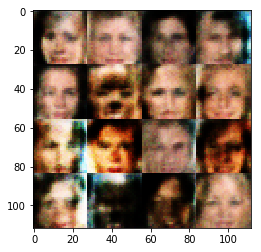

Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 5.9810
Epoch 1/1... Discriminator Loss: 1.6961... Generator Loss: 0.3390
Epoch 1/1... Discriminator Loss: 0.6996... Generator Loss: 1.3672
Epoch 1/1... Discriminator Loss: 0.3775... Generator Loss: 3.9430
Epoch 1/1... Discriminator Loss: 1.9529... Generator Loss: 0.2685
Epoch 1/1... Discriminator Loss: 1.7835... Generator Loss: 0.3520
Epoch 1/1... Discriminator Loss: 1.8246... Generator Loss: 0.3128
Epoch 1/1... Discriminator Loss: 2.2614... Generator Loss: 0.1937
Epoch 1/1... Discriminator Loss: 0.6450... Generator Loss: 2.0750
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 4.7270


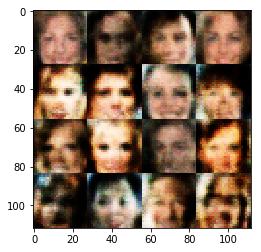

Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 2.9459
Epoch 1/1... Discriminator Loss: 0.5074... Generator Loss: 4.4991
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 1.3803
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 0.8161... Generator Loss: 1.1581
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 4.4305
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 3.1378
Epoch 1/1... Discriminator Loss: 0.4070... Generator Loss: 5.1796
Epoch 1/1... Discriminator Loss: 0.7031... Generator Loss: 1.5295
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 2.5797


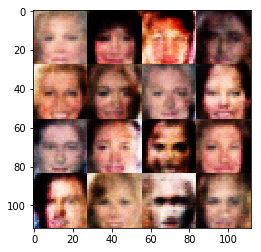

Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 2.7408
Epoch 1/1... Discriminator Loss: 0.5678... Generator Loss: 1.8447
Epoch 1/1... Discriminator Loss: 0.5886... Generator Loss: 1.7558
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 2.8077
Epoch 1/1... Discriminator Loss: 0.6001... Generator Loss: 1.6588
Epoch 1/1... Discriminator Loss: 0.4803... Generator Loss: 3.7742
Epoch 1/1... Discriminator Loss: 0.4975... Generator Loss: 2.2001
Epoch 1/1... Discriminator Loss: 0.4326... Generator Loss: 2.8934
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.5311
Epoch 1/1... Discriminator Loss: 0.5808... Generator Loss: 1.8791


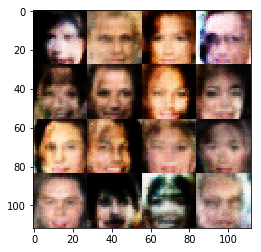

Epoch 1/1... Discriminator Loss: 0.5263... Generator Loss: 2.2659
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 1.9630
Epoch 1/1... Discriminator Loss: 0.4730... Generator Loss: 2.4700
Epoch 1/1... Discriminator Loss: 1.5323... Generator Loss: 0.4385
Epoch 1/1... Discriminator Loss: 0.7414... Generator Loss: 4.8414
Epoch 1/1... Discriminator Loss: 0.6548... Generator Loss: 1.7270
Epoch 1/1... Discriminator Loss: 0.5009... Generator Loss: 2.2353
Epoch 1/1... Discriminator Loss: 0.5267... Generator Loss: 2.0379
Epoch 1/1... Discriminator Loss: 0.7311... Generator Loss: 1.5462
Epoch 1/1... Discriminator Loss: 0.3995... Generator Loss: 4.9291


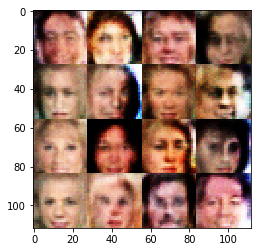

Epoch 1/1... Discriminator Loss: 0.8847... Generator Loss: 4.5017
Epoch 1/1... Discriminator Loss: 1.1213... Generator Loss: 6.0866
Epoch 1/1... Discriminator Loss: 0.5553... Generator Loss: 1.9255
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 5.2725
Epoch 1/1... Discriminator Loss: 0.4017... Generator Loss: 3.1779
Epoch 1/1... Discriminator Loss: 0.4467... Generator Loss: 4.7746
Epoch 1/1... Discriminator Loss: 0.6358... Generator Loss: 1.6371
Epoch 1/1... Discriminator Loss: 0.6464... Generator Loss: 5.3430
Epoch 1/1... Discriminator Loss: 0.4399... Generator Loss: 2.7452
Epoch 1/1... Discriminator Loss: 0.3767... Generator Loss: 3.9235


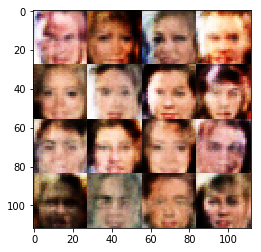

Epoch 1/1... Discriminator Loss: 0.4629... Generator Loss: 2.6859
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 3.0387
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 4.1102
Epoch 1/1... Discriminator Loss: 0.5722... Generator Loss: 1.8551
Epoch 1/1... Discriminator Loss: 0.4721... Generator Loss: 2.6437
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 0.4238... Generator Loss: 2.8503
Epoch 1/1... Discriminator Loss: 2.0857... Generator Loss: 0.2228
Epoch 1/1... Discriminator Loss: 0.9975... Generator Loss: 3.5440
Epoch 1/1... Discriminator Loss: 0.6304... Generator Loss: 4.4119


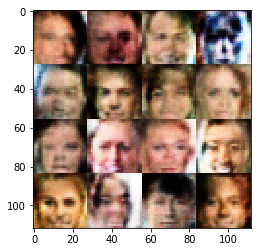

Epoch 1/1... Discriminator Loss: 0.4126... Generator Loss: 3.4531
Epoch 1/1... Discriminator Loss: 0.4088... Generator Loss: 3.2181
Epoch 1/1... Discriminator Loss: 0.4963... Generator Loss: 2.1750
Epoch 1/1... Discriminator Loss: 0.4818... Generator Loss: 2.3029
Epoch 1/1... Discriminator Loss: 0.4187... Generator Loss: 3.3475
Epoch 1/1... Discriminator Loss: 0.5715... Generator Loss: 5.7011
Epoch 1/1... Discriminator Loss: 0.5798... Generator Loss: 3.3496
Epoch 1/1... Discriminator Loss: 0.4988... Generator Loss: 4.6192
Epoch 1/1... Discriminator Loss: 1.0022... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 0.6008... Generator Loss: 1.6538


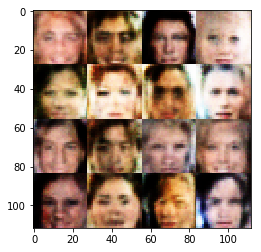

Epoch 1/1... Discriminator Loss: 0.5788... Generator Loss: 4.4572
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 5.4388
Epoch 1/1... Discriminator Loss: 0.6584... Generator Loss: 1.4930
Epoch 1/1... Discriminator Loss: 0.5511... Generator Loss: 4.7004
Epoch 1/1... Discriminator Loss: 0.4380... Generator Loss: 2.9317
Epoch 1/1... Discriminator Loss: 0.7495... Generator Loss: 3.6394
Epoch 1/1... Discriminator Loss: 0.5392... Generator Loss: 1.9290
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 4.7857
Epoch 1/1... Discriminator Loss: 0.4421... Generator Loss: 2.6259
Epoch 1/1... Discriminator Loss: 0.4802... Generator Loss: 5.5587


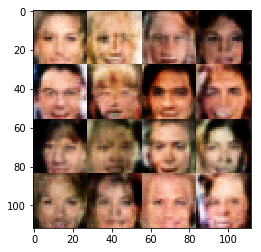

Epoch 1/1... Discriminator Loss: 0.5674... Generator Loss: 2.5390
Epoch 1/1... Discriminator Loss: 0.5013... Generator Loss: 3.1075
Epoch 1/1... Discriminator Loss: 0.4282... Generator Loss: 2.7583
Epoch 1/1... Discriminator Loss: 0.4530... Generator Loss: 2.6566
Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 1.3806
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 6.6405
Epoch 1/1... Discriminator Loss: 0.5378... Generator Loss: 2.0324
Epoch 1/1... Discriminator Loss: 0.4386... Generator Loss: 2.7437
Epoch 1/1... Discriminator Loss: 0.4755... Generator Loss: 2.4158
Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 3.4981


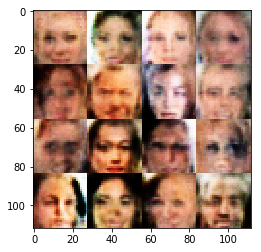

Epoch 1/1... Discriminator Loss: 0.4463... Generator Loss: 2.8607
Epoch 1/1... Discriminator Loss: 0.4406... Generator Loss: 2.6482
Epoch 1/1... Discriminator Loss: 0.4094... Generator Loss: 3.7344
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 0.9497... Generator Loss: 0.9048
Epoch 1/1... Discriminator Loss: 0.4829... Generator Loss: 2.4014
Epoch 1/1... Discriminator Loss: 0.5241... Generator Loss: 1.9898
Epoch 1/1... Discriminator Loss: 0.4601... Generator Loss: 2.6033
Epoch 1/1... Discriminator Loss: 0.3723... Generator Loss: 4.4580
Epoch 1/1... Discriminator Loss: 0.4530... Generator Loss: 2.6366


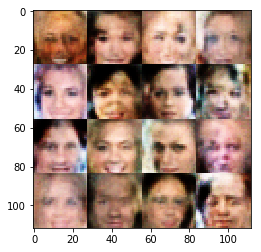

Epoch 1/1... Discriminator Loss: 0.5526... Generator Loss: 1.9333
Epoch 1/1... Discriminator Loss: 0.5668... Generator Loss: 3.2043
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.4638
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 2.6864
Epoch 1/1... Discriminator Loss: 0.4194... Generator Loss: 3.3567
Epoch 1/1... Discriminator Loss: 0.5175... Generator Loss: 6.0006
Epoch 1/1... Discriminator Loss: 0.3997... Generator Loss: 3.1766
Epoch 1/1... Discriminator Loss: 1.1730... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 0.4468... Generator Loss: 3.2074
Epoch 1/1... Discriminator Loss: 0.4306... Generator Loss: 2.9236


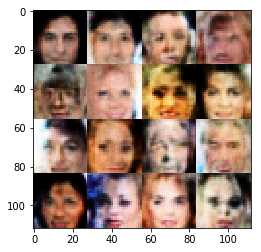

Epoch 1/1... Discriminator Loss: 0.5179... Generator Loss: 2.2620
Epoch 1/1... Discriminator Loss: 0.3999... Generator Loss: 5.3268
Epoch 1/1... Discriminator Loss: 1.1509... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 0.4216... Generator Loss: 6.0627
Epoch 1/1... Discriminator Loss: 0.4642... Generator Loss: 5.3008
Epoch 1/1... Discriminator Loss: 0.4999... Generator Loss: 2.6570
Epoch 1/1... Discriminator Loss: 0.5094... Generator Loss: 3.5141
Epoch 1/1... Discriminator Loss: 0.4080... Generator Loss: 3.6866
Epoch 1/1... Discriminator Loss: 0.5306... Generator Loss: 2.4738
Epoch 1/1... Discriminator Loss: 0.6750... Generator Loss: 1.4205


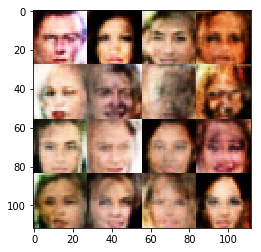

Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 1.8154
Epoch 1/1... Discriminator Loss: 0.4541... Generator Loss: 3.6071
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 3.7995
Epoch 1/1... Discriminator Loss: 0.7254... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 3.3285
Epoch 1/1... Discriminator Loss: 0.3888... Generator Loss: 3.6692
Epoch 1/1... Discriminator Loss: 0.5400... Generator Loss: 2.7832
Epoch 1/1... Discriminator Loss: 0.4895... Generator Loss: 5.1545
Epoch 1/1... Discriminator Loss: 0.5012... Generator Loss: 4.7034
Epoch 1/1... Discriminator Loss: 0.7111... Generator Loss: 1.4133


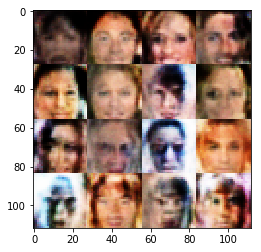

Epoch 1/1... Discriminator Loss: 0.4551... Generator Loss: 2.5734
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 0.8755
Epoch 1/1... Discriminator Loss: 0.4199... Generator Loss: 3.9713
Epoch 1/1... Discriminator Loss: 0.5431... Generator Loss: 1.8795
Epoch 1/1... Discriminator Loss: 0.8299... Generator Loss: 3.4031
Epoch 1/1... Discriminator Loss: 0.7363... Generator Loss: 1.3292
Epoch 1/1... Discriminator Loss: 0.4197... Generator Loss: 3.2675
Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 3.5025
Epoch 1/1... Discriminator Loss: 1.7225... Generator Loss: 0.3379
Epoch 1/1... Discriminator Loss: 0.8183... Generator Loss: 1.1314


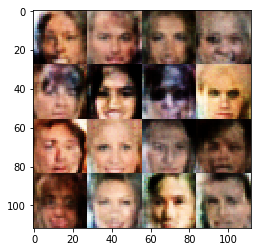

Epoch 1/1... Discriminator Loss: 0.4090... Generator Loss: 3.9600
Epoch 1/1... Discriminator Loss: 0.3805... Generator Loss: 4.4315
Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 2.9832
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 4.4409
Epoch 1/1... Discriminator Loss: 0.5504... Generator Loss: 2.8422
Epoch 1/1... Discriminator Loss: 0.5665... Generator Loss: 2.1966
Epoch 1/1... Discriminator Loss: 0.3953... Generator Loss: 3.3765
Epoch 1/1... Discriminator Loss: 0.4069... Generator Loss: 3.1759
Epoch 1/1... Discriminator Loss: 0.4528... Generator Loss: 2.7017
Epoch 1/1... Discriminator Loss: 0.3968... Generator Loss: 4.0378


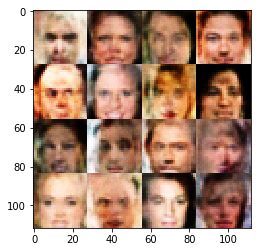

Epoch 1/1... Discriminator Loss: 0.3462... Generator Loss: 6.1455
Epoch 1/1... Discriminator Loss: 0.5294... Generator Loss: 2.3841
Epoch 1/1... Discriminator Loss: 0.3890... Generator Loss: 3.5521
Epoch 1/1... Discriminator Loss: 0.6398... Generator Loss: 3.8440
Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 2.2819
Epoch 1/1... Discriminator Loss: 0.5279... Generator Loss: 2.2523
Epoch 1/1... Discriminator Loss: 0.4854... Generator Loss: 3.0316
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.4869
Epoch 1/1... Discriminator Loss: 0.6870... Generator Loss: 3.1779
Epoch 1/1... Discriminator Loss: 0.5136... Generator Loss: 2.4104


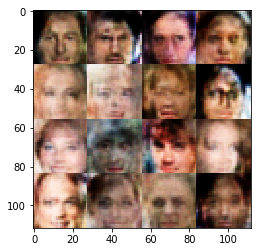

Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 2.7372
Epoch 1/1... Discriminator Loss: 2.3424... Generator Loss: 0.1968
Epoch 1/1... Discriminator Loss: 0.4254... Generator Loss: 3.7648
Epoch 1/1... Discriminator Loss: 0.5926... Generator Loss: 6.3359
Epoch 1/1... Discriminator Loss: 0.3521... Generator Loss: 6.0330
Epoch 1/1... Discriminator Loss: 0.7414... Generator Loss: 1.3350
Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 0.9877
Epoch 1/1... Discriminator Loss: 0.5133... Generator Loss: 2.6454
Epoch 1/1... Discriminator Loss: 0.5047... Generator Loss: 2.1454
Epoch 1/1... Discriminator Loss: 0.5934... Generator Loss: 1.9995


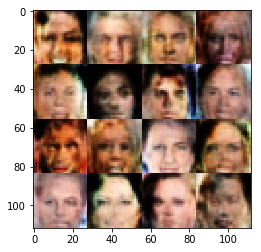

Epoch 1/1... Discriminator Loss: 0.4206... Generator Loss: 4.7237
Epoch 1/1... Discriminator Loss: 0.6353... Generator Loss: 2.0295
Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 3.0336
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 1.4820
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 0.9583... Generator Loss: 1.4988
Epoch 1/1... Discriminator Loss: 0.6407... Generator Loss: 1.5311
Epoch 1/1... Discriminator Loss: 0.6839... Generator Loss: 3.0626
Epoch 1/1... Discriminator Loss: 0.4547... Generator Loss: 2.5530
Epoch 1/1... Discriminator Loss: 0.4581... Generator Loss: 2.5434


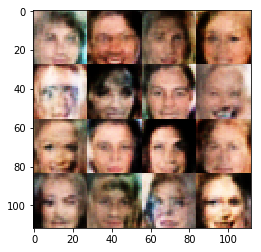

Epoch 1/1... Discriminator Loss: 0.4443... Generator Loss: 2.6469
Epoch 1/1... Discriminator Loss: 0.4146... Generator Loss: 4.9649
Epoch 1/1... Discriminator Loss: 0.6714... Generator Loss: 1.6389
Epoch 1/1... Discriminator Loss: 0.4116... Generator Loss: 6.9426
Epoch 1/1... Discriminator Loss: 0.3751... Generator Loss: 4.2914
Epoch 1/1... Discriminator Loss: 0.7141... Generator Loss: 1.3971
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 5.3103
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 2.0631
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 1.6648
Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 3.2581


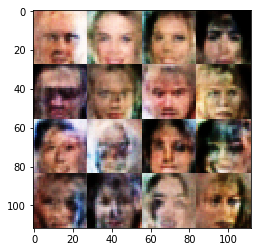

Epoch 1/1... Discriminator Loss: 0.3883... Generator Loss: 3.9352
Epoch 1/1... Discriminator Loss: 0.7028... Generator Loss: 4.1059
Epoch 1/1... Discriminator Loss: 0.4685... Generator Loss: 3.0834
Epoch 1/1... Discriminator Loss: 0.3878... Generator Loss: 4.0515
Epoch 1/1... Discriminator Loss: 1.6636... Generator Loss: 5.7038
Epoch 1/1... Discriminator Loss: 0.5340... Generator Loss: 2.5902
Epoch 1/1... Discriminator Loss: 0.4721... Generator Loss: 3.3910
Epoch 1/1... Discriminator Loss: 0.5207... Generator Loss: 3.4235
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 4.1082
Epoch 1/1... Discriminator Loss: 0.4112... Generator Loss: 3.7857


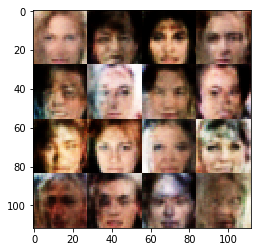

Epoch 1/1... Discriminator Loss: 1.1024... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 0.3952... Generator Loss: 3.6639
Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 1.0123
Epoch 1/1... Discriminator Loss: 0.3861... Generator Loss: 4.0829
Epoch 1/1... Discriminator Loss: 0.4588... Generator Loss: 2.4735
Epoch 1/1... Discriminator Loss: 0.5665... Generator Loss: 4.0822
Epoch 1/1... Discriminator Loss: 0.3737... Generator Loss: 4.9429
Epoch 1/1... Discriminator Loss: 0.4769... Generator Loss: 2.7938
Epoch 1/1... Discriminator Loss: 0.3875... Generator Loss: 4.5104
Epoch 1/1... Discriminator Loss: 0.9518... Generator Loss: 1.1331


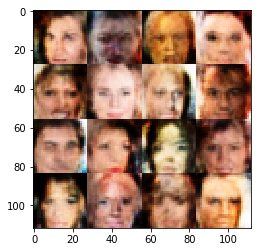

Epoch 1/1... Discriminator Loss: 0.4700... Generator Loss: 2.4450
Epoch 1/1... Discriminator Loss: 0.6041... Generator Loss: 1.8774
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 2.5613
Epoch 1/1... Discriminator Loss: 0.3984... Generator Loss: 3.4305
Epoch 1/1... Discriminator Loss: 0.5052... Generator Loss: 2.4674
Epoch 1/1... Discriminator Loss: 0.4248... Generator Loss: 3.3430
Epoch 1/1... Discriminator Loss: 1.2299... Generator Loss: 3.1365
Epoch 1/1... Discriminator Loss: 0.6422... Generator Loss: 1.8475
Epoch 1/1... Discriminator Loss: 0.3613... Generator Loss: 4.8952
Epoch 1/1... Discriminator Loss: 0.3637... Generator Loss: 5.6565


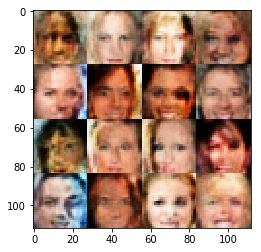

Epoch 1/1... Discriminator Loss: 0.6957... Generator Loss: 3.2369
Epoch 1/1... Discriminator Loss: 0.5461... Generator Loss: 2.0411
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 0.9580... Generator Loss: 3.1622
Epoch 1/1... Discriminator Loss: 0.5591... Generator Loss: 3.8510
Epoch 1/1... Discriminator Loss: 0.5542... Generator Loss: 2.1410
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 3.1768
Epoch 1/1... Discriminator Loss: 0.3535... Generator Loss: 5.0300
Epoch 1/1... Discriminator Loss: 0.3591... Generator Loss: 5.9649
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.4857


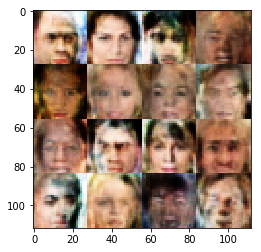

Epoch 1/1... Discriminator Loss: 0.4638... Generator Loss: 2.6869
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 5.1823
Epoch 1/1... Discriminator Loss: 0.6940... Generator Loss: 1.5288
Epoch 1/1... Discriminator Loss: 0.3971... Generator Loss: 3.4145
Epoch 1/1... Discriminator Loss: 0.6252... Generator Loss: 1.6528
Epoch 1/1... Discriminator Loss: 0.4513... Generator Loss: 3.5746
Epoch 1/1... Discriminator Loss: 0.4495... Generator Loss: 2.8959
Epoch 1/1... Discriminator Loss: 0.4256... Generator Loss: 3.0244
Epoch 1/1... Discriminator Loss: 0.5441... Generator Loss: 2.0386
Epoch 1/1... Discriminator Loss: 0.4630... Generator Loss: 3.8108


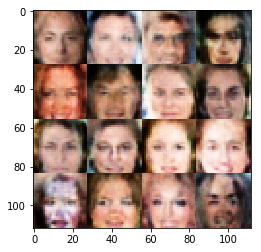

Epoch 1/1... Discriminator Loss: 0.4031... Generator Loss: 4.6394
Epoch 1/1... Discriminator Loss: 0.5258... Generator Loss: 2.3715
Epoch 1/1... Discriminator Loss: 0.3828... Generator Loss: 4.6427
Epoch 1/1... Discriminator Loss: 0.5042... Generator Loss: 2.3258
Epoch 1/1... Discriminator Loss: 0.7639... Generator Loss: 4.9498
Epoch 1/1... Discriminator Loss: 0.7749... Generator Loss: 1.3857
Epoch 1/1... Discriminator Loss: 0.9285... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 0.3870... Generator Loss: 3.9059
Epoch 1/1... Discriminator Loss: 0.5513... Generator Loss: 2.0868
Epoch 1/1... Discriminator Loss: 0.4656... Generator Loss: 2.7269


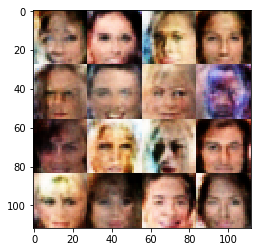

Epoch 1/1... Discriminator Loss: 1.8249... Generator Loss: 7.4941
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 3.6583
Epoch 1/1... Discriminator Loss: 0.5231... Generator Loss: 2.4936
Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 0.6027... Generator Loss: 1.6959
Epoch 1/1... Discriminator Loss: 0.4546... Generator Loss: 3.6266


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.